# The Sparks Foundation

# Domain- Data Science and Business Analytics (GRIP May21)


## Task 1- Score Prediction Using Supervised ML

***(A simple linear regression task involving two variables)***

### By- Annesha Sahu
### National Institute of Technology, Rourkela

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import and observe given data

data= pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**So, we don't have any null values in our data.**

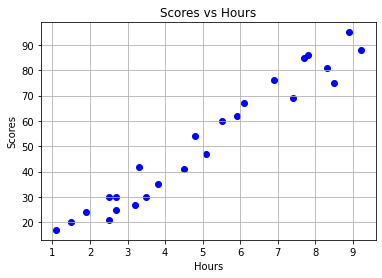

In [5]:
# plot a scatter graph to observe the relationship between scores and hours studied

plt.scatter(data['Hours'], data['Scores'], color= 'blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Scores vs Hours")
plt.grid()
plt.show()

**From the above graph we can see an approximate linear relation between Percentage scored and the Hours studied.**

In [6]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
# separate dataset into dependent and independent variable

X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

In [8]:
# split train and test dataset

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X, Y, test_size= 0.3, random_state= 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17, 1), (8, 1), (17,), (8,))

In [9]:
# import linear regression and fit train data

from sklearn.linear_model import LinearRegression
lr = LinearRegression()  
lr.fit(x_train, y_train)

LinearRegression()

In [10]:
# predictions over the train dataset

predict= lr.predict(x_train)
predict

array([69.91192552, 13.13823874, 52.29250548, 77.74277887, 34.67308545,
       83.61591888, 92.4256289 , 62.08107217, 36.63079879, 28.79994544,
       56.20793216, 28.79994544, 85.57363222, 26.8422321 , 49.35593548,
       89.48905889, 46.41936547])

In [11]:
# Comparing Actual values vs Predicted values

compare_x = pd.DataFrame({'Actual': y_train, 'Predicted': predict})  
compare_x.head()

,Actual,Predicted
0,76,69.911926
1,17,13.138239
2,47,52.292505
3,85,77.742779
4,42,34.673085


In [12]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9],
       [7.8]])

In [13]:
# predictions over the test dataset

test_predict= lr.predict(x_test)
print(test_predict)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [14]:
# Comparing Actual values vs Predicted values

compare_y = pd.DataFrame({'Actual': y_test, 'Predicted': test_predict})  
compare_y

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


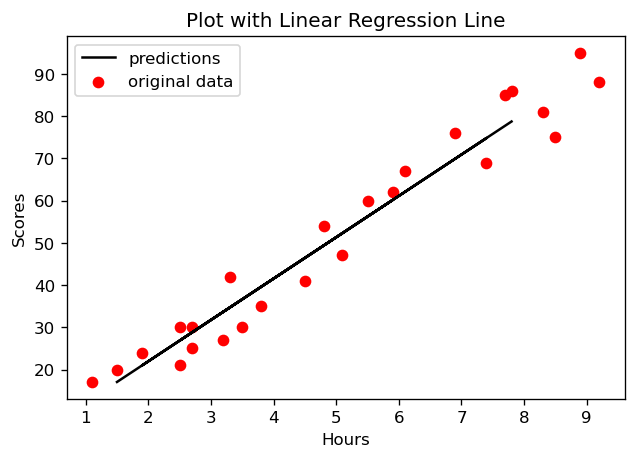

In [15]:
# analyse linear regression line 

plt.figure( figsize=(6,4), dpi= 120)
plt.scatter(X, Y, color='red', label= "original data")
plt.plot(x_test, test_predict, color= 'black', label= "predictions")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Plot with Linear Regression Line")
plt.legend()
plt.show()

### **Model Evaluation**

In [16]:
# atlast evaluate the model

from sklearn.metrics import mean_absolute_error as mae
error = mae(y_test, test_predict)
error

4.419727808027652

**Problem- What will be the predicted score if a student studies for 9.25 hrs/day?**

In [17]:
# test with the given number of hours to predict the score
 
hours =9.25
marks= lr.predict([[hours]])
print("No of Hours studied = {}".format(hours))
print("Predicted Score = {}".format(round(marks[0],3)))

No of Hours studied = 9.25
Predicted Score = 92.915


**Thus, according to the linear regression model if, No of Hours studied = 9.25**
                                                **then, Predicted Score = 92.915**